In [9]:
import pickle
import re
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.corpus import stopwords
import seaborn as sns

# Téléchargement des stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# 1. Charger les données
with open('newsgroups', 'rb') as f:
    newsgroup_data = pickle.load(f)




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
# 2. Nettoyage du texte
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)          # supprimer les caractères spéciaux
    text = re.sub(r'\s+', ' ', text)          # supprimer les espaces multiples
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

corpus_cleaned = [clean_text(doc) for doc in newsgroup_data]



In [12]:
# 3. Vectorisation
# Pour LDA : CountVectorizer
count_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
count_data = count_vectorizer.fit_transform(corpus_cleaned)

# Pour NMF : TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_data = tfidf_vectorizer.fit_transform(corpus_cleaned)



In [13]:
# 4. Appliquer LDA
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(count_data)

# 5. Appliquer NMF
nmf = NMF(n_components=10, random_state=42)
nmf.fit(tfidf_data)



NMF(n_components=10, random_state=42)

In [14]:
# 6. Affichage des 10 mots les plus importants par topic
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(20, 7), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_idx = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_idx]
        weights = topic[top_features_idx]
        ax = axes[topic_idx]
        ax.barh(top_features, weights)
        ax.set_title(f'Topic {topic_idx + 1}', fontsize=12)
        ax.invert_yaxis()
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()



In [15]:
# 7. Affichage wordcloud
def show_wordcloud(model, feature_names, title):
    for idx, topic in enumerate(model.components_):
        print(f"WordCloud for Topic {idx+1}")
        word_freq = {feature_names[i]: topic[i] for i in topic.argsort()[-30:]}
        wordcloud = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(word_freq)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f"{title} - Topic {idx + 1}")
        plt.show()



🔹 Top Words - LDA


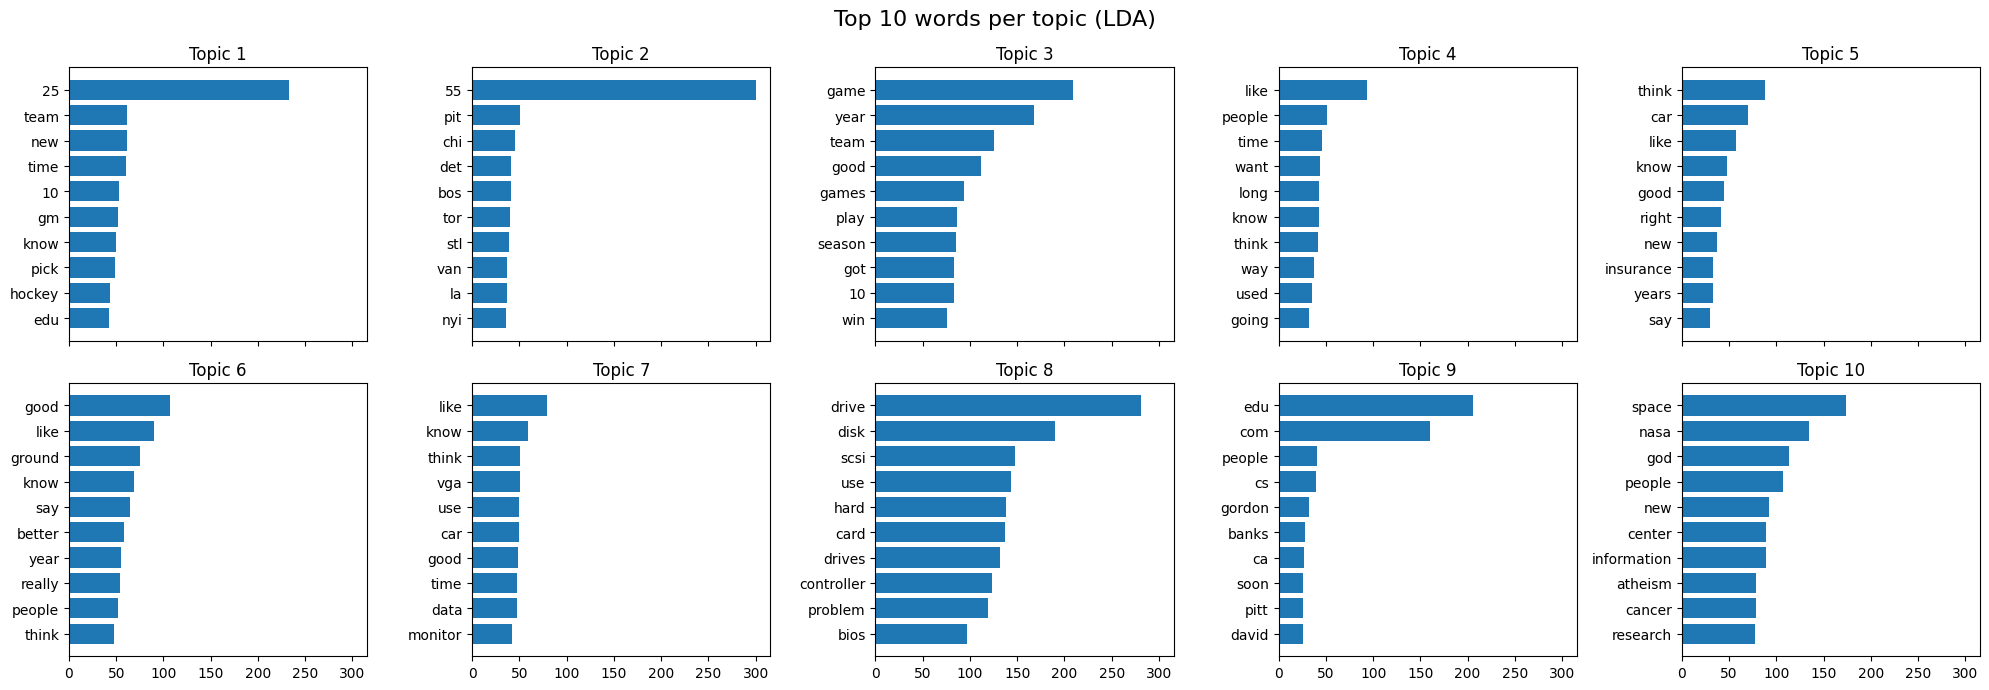

In [17]:
# 8. Afficher les résultats
print("🔹 Top Words - LDA")
plot_top_words(lda, count_vectorizer.get_feature_names_out(), 10, 'Top 10 words per topic (LDA)')



🔹 Wordclouds - LDA
WordCloud for Topic 1


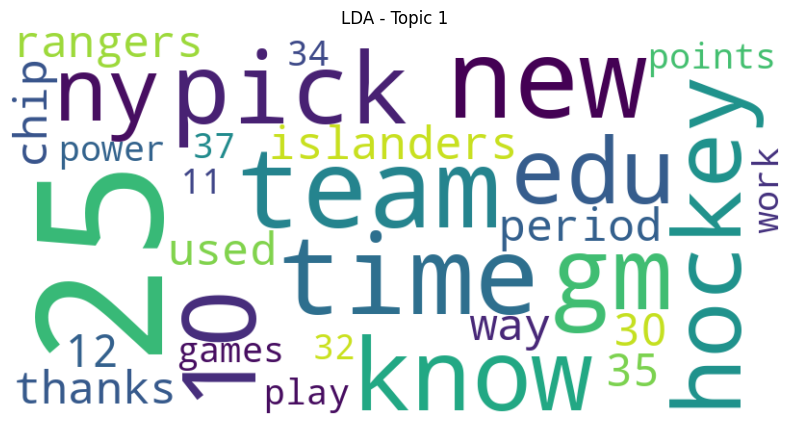

WordCloud for Topic 2


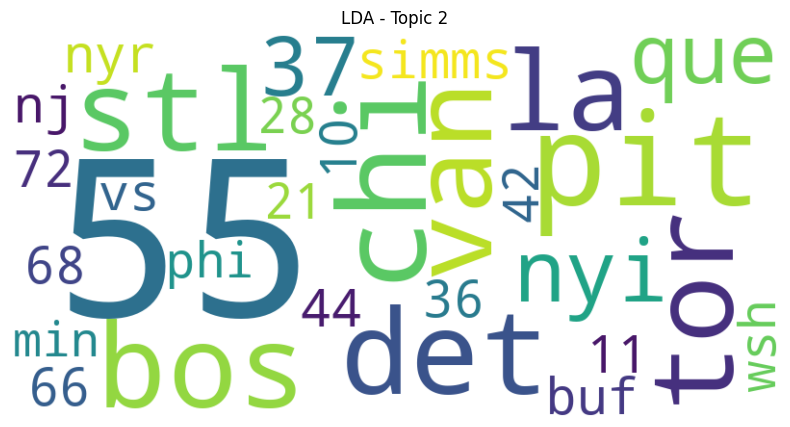

WordCloud for Topic 3


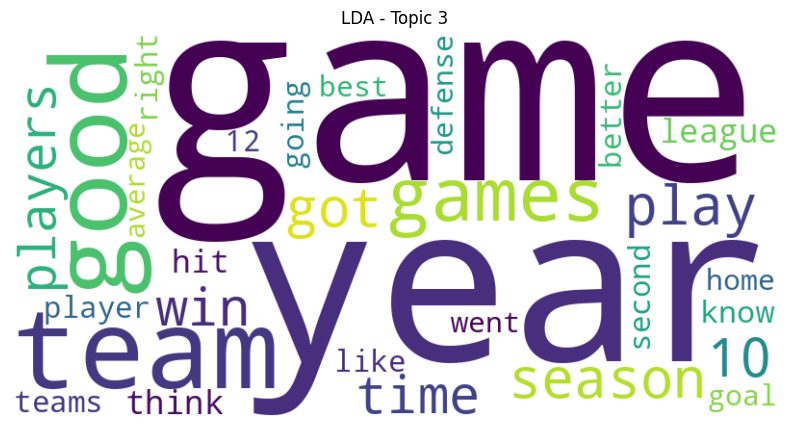

WordCloud for Topic 4


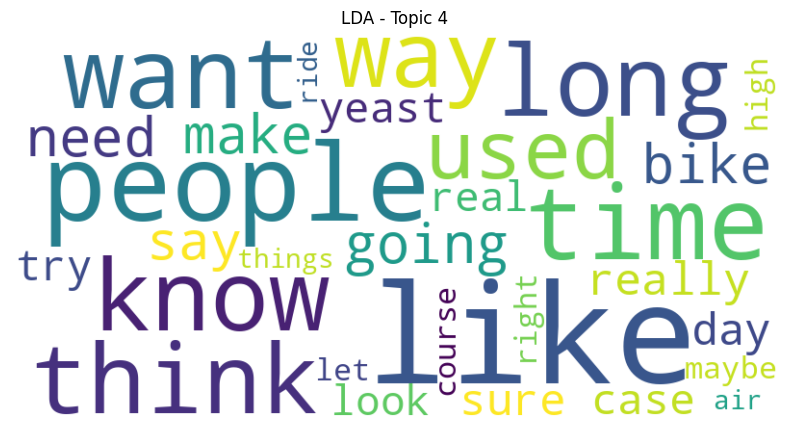

WordCloud for Topic 5


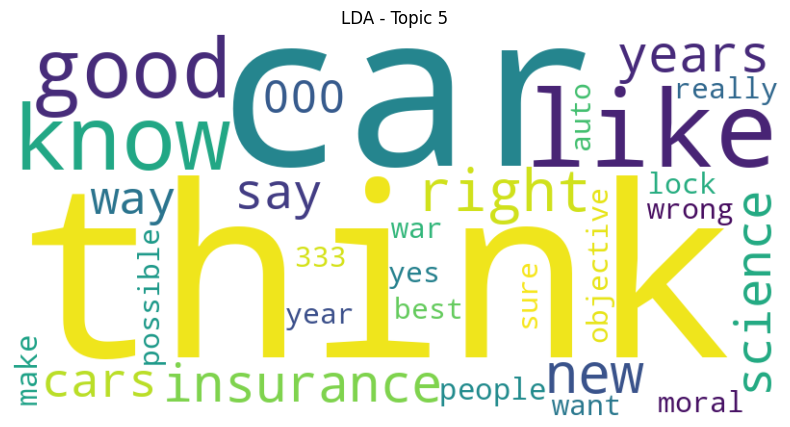

WordCloud for Topic 6


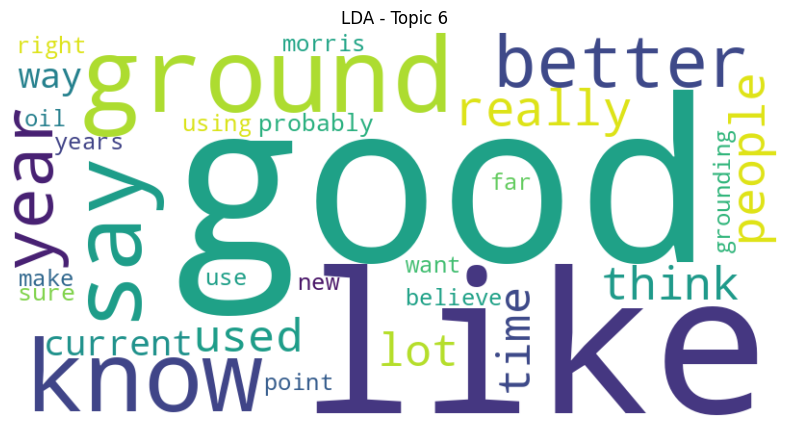

WordCloud for Topic 7


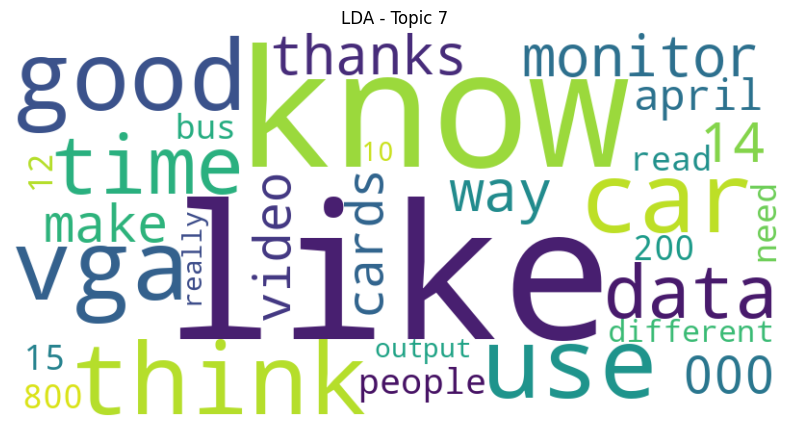

WordCloud for Topic 8


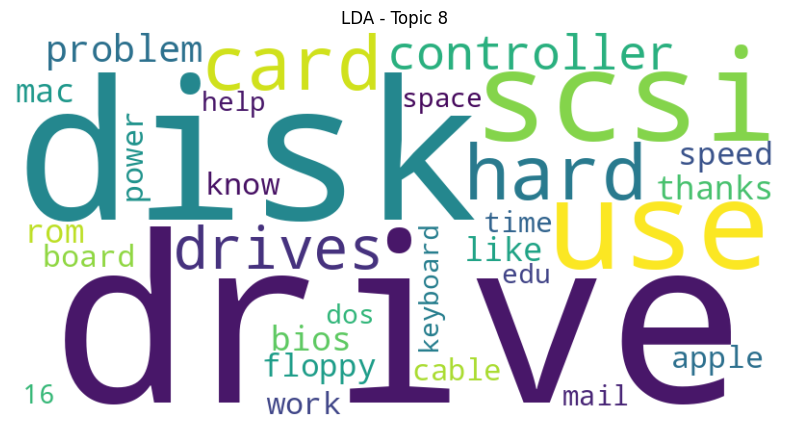

WordCloud for Topic 9


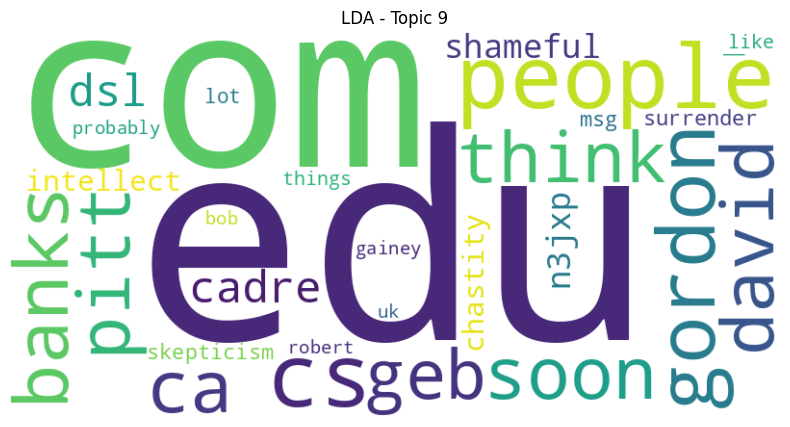

WordCloud for Topic 10


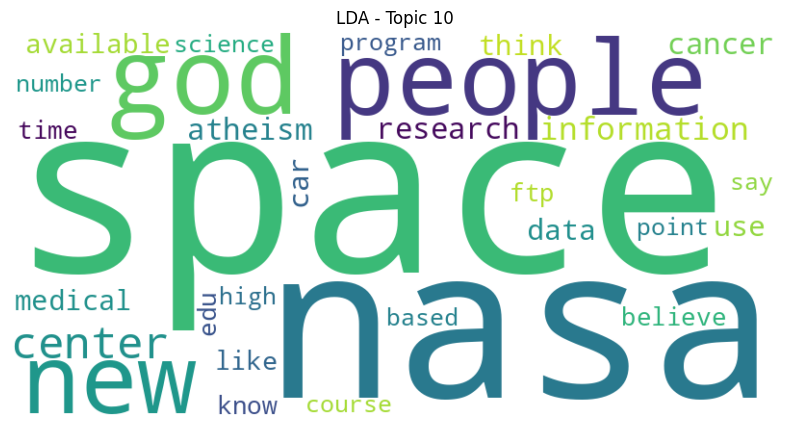

In [18]:
print("🔹 Wordclouds - LDA")
show_wordcloud(lda, count_vectorizer.get_feature_names_out(), 'LDA')



🔹 Top Words - NMF


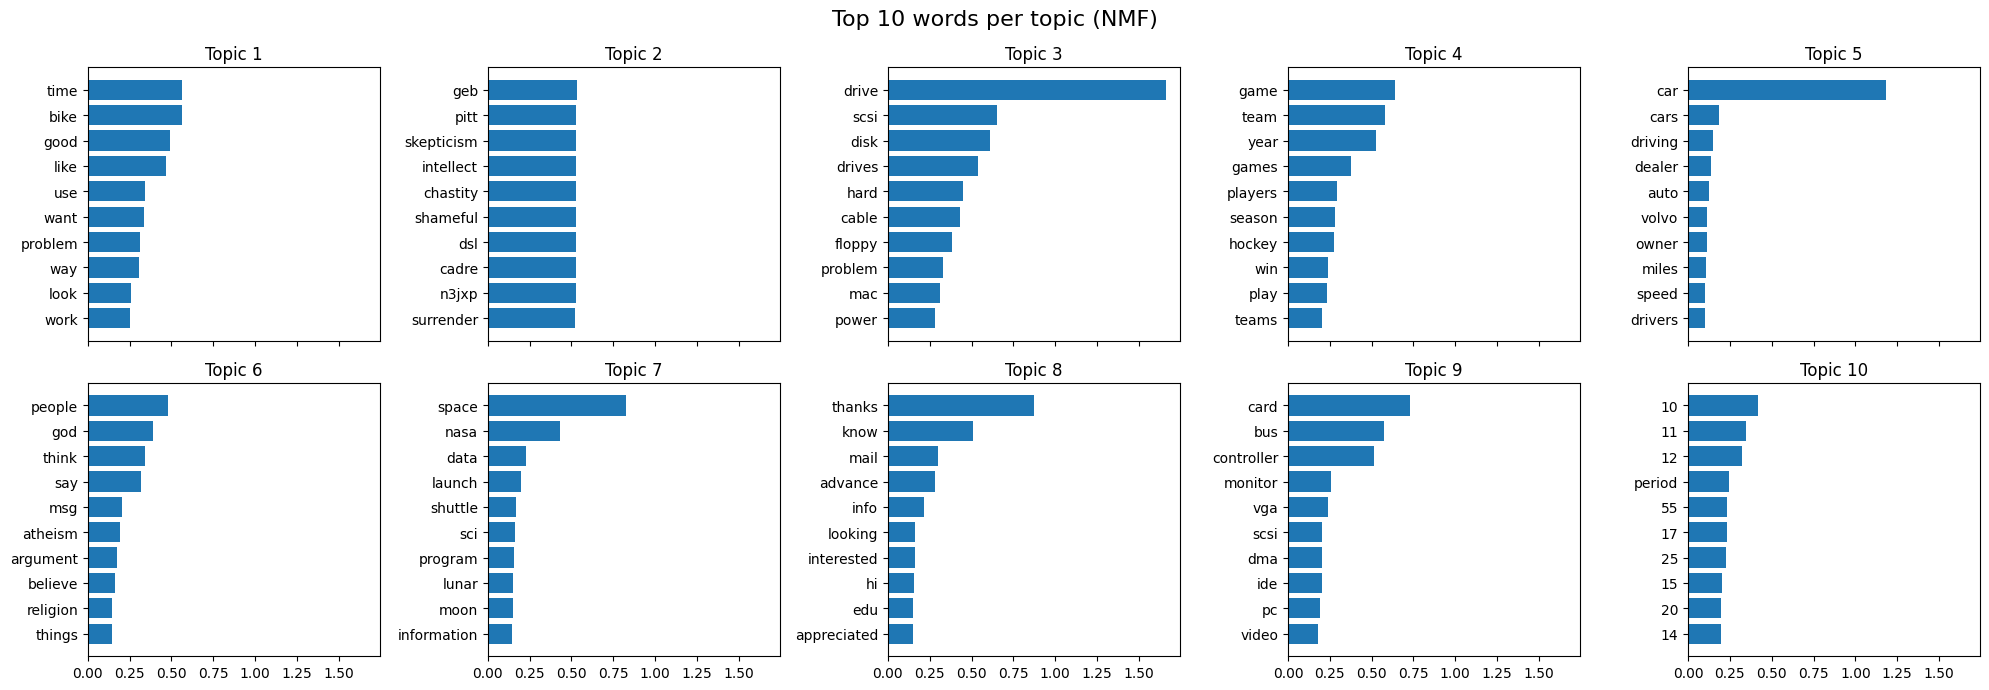

In [19]:
print("🔹 Top Words - NMF")
plot_top_words(nmf, tfidf_vectorizer.get_feature_names_out(), 10, 'Top 10 words per topic (NMF)')



🔹 Wordclouds - NMF
WordCloud for Topic 1


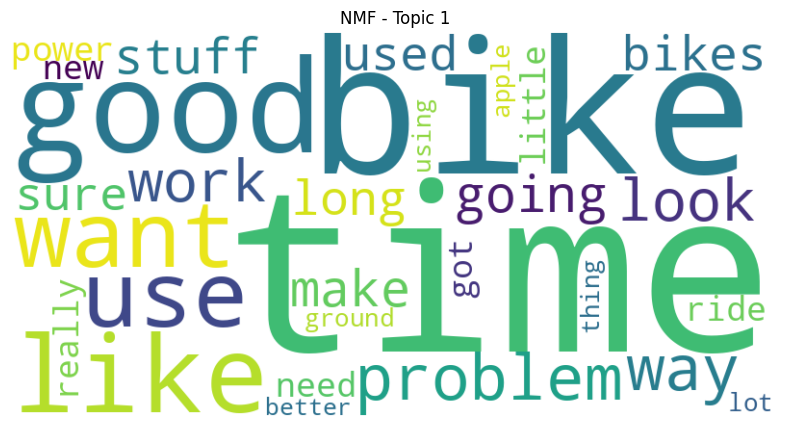

WordCloud for Topic 2


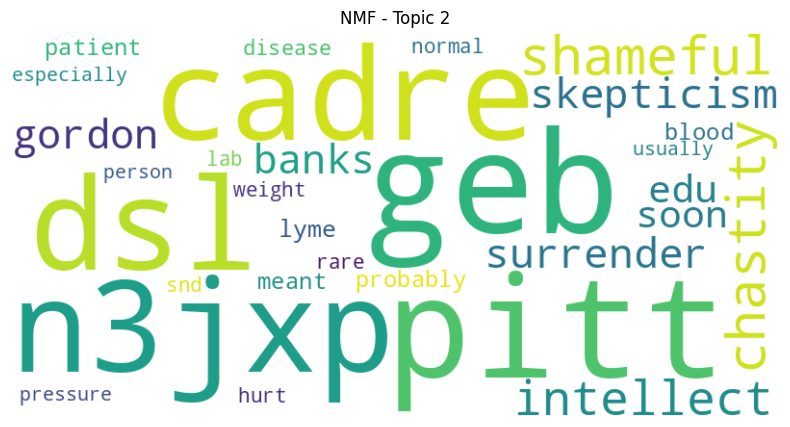

WordCloud for Topic 3


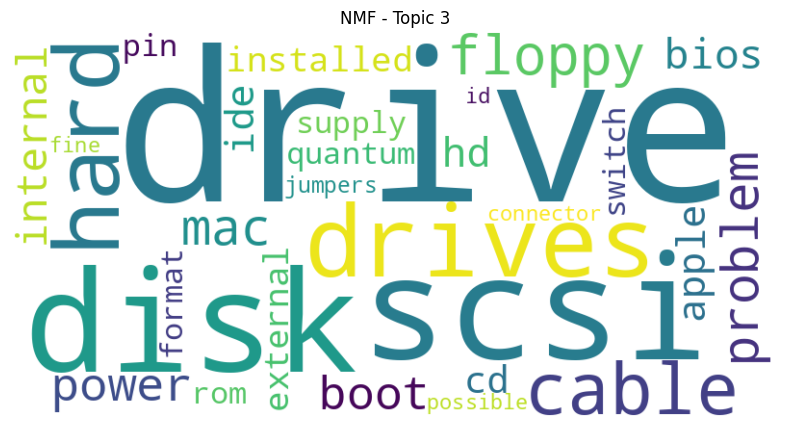

WordCloud for Topic 4


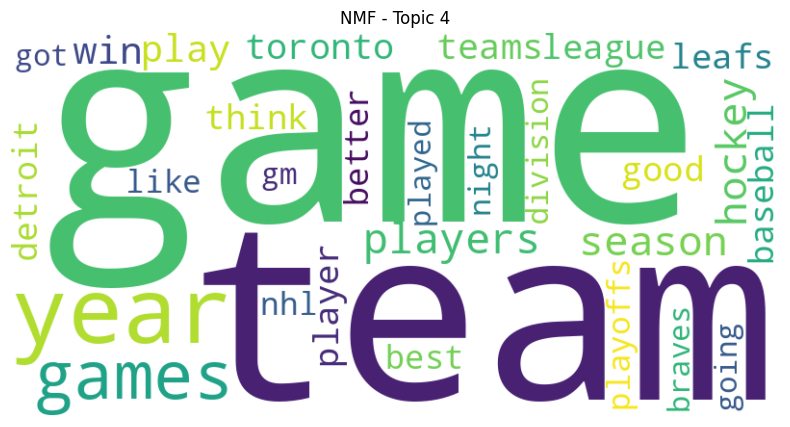

WordCloud for Topic 5


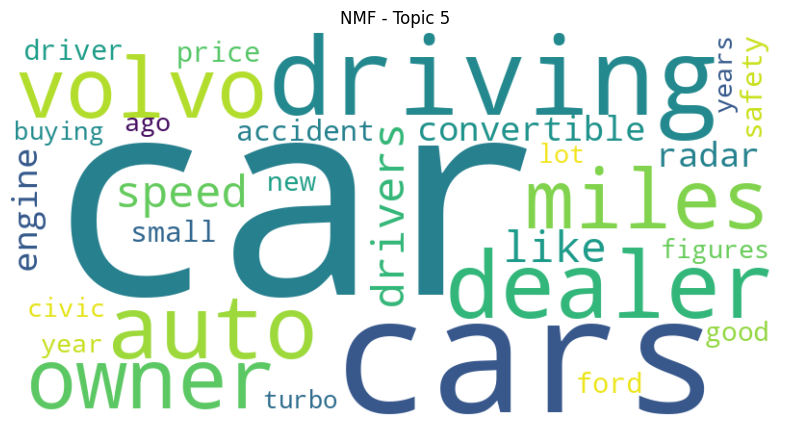

WordCloud for Topic 6


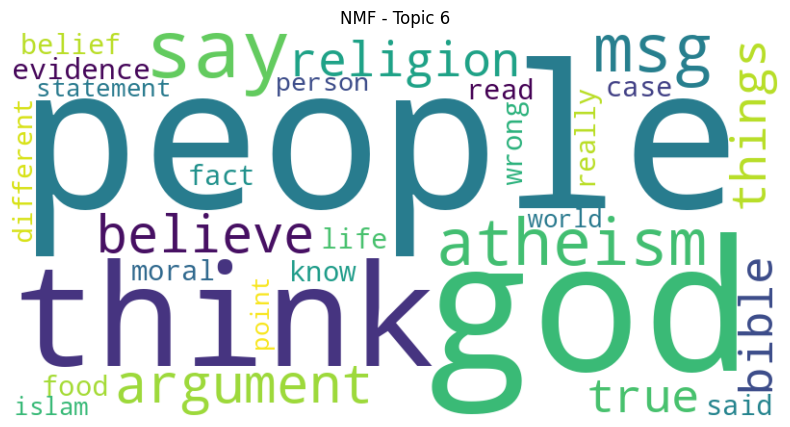

WordCloud for Topic 7


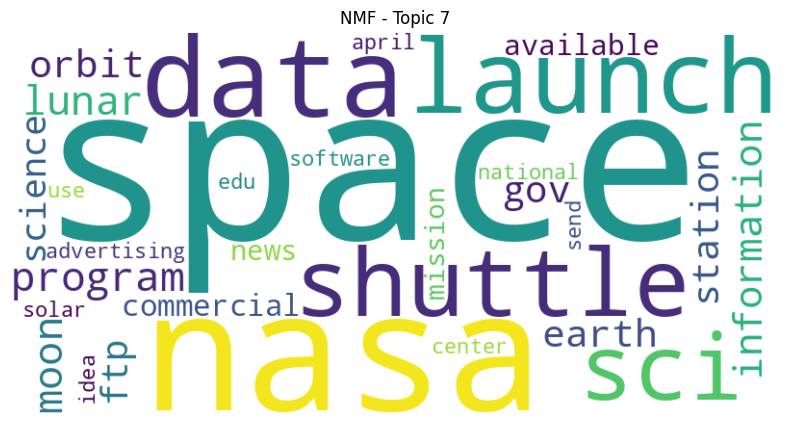

WordCloud for Topic 8


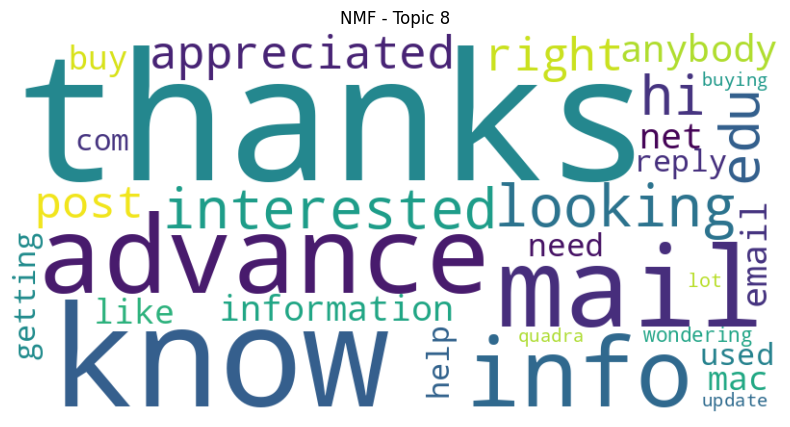

WordCloud for Topic 9


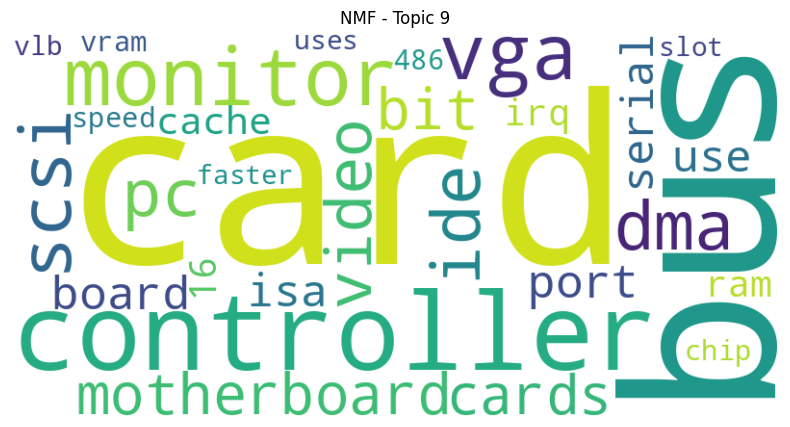

WordCloud for Topic 10


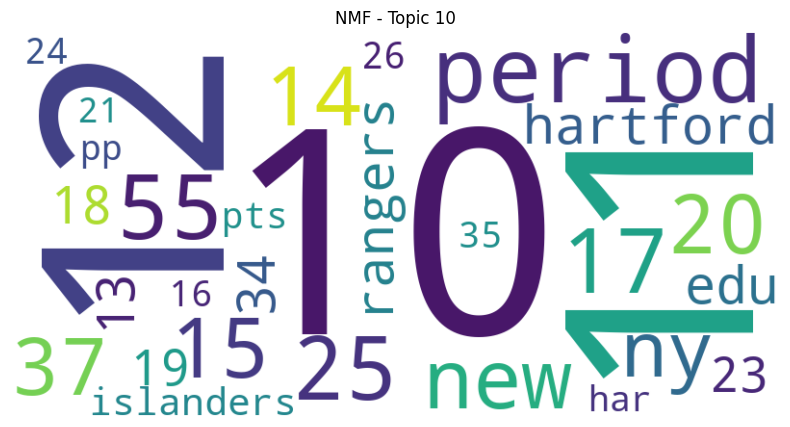

In [20]:
print("🔹 Wordclouds - NMF")
show_wordcloud(nmf, tfidf_vectorizer.get_feature_names_out(), 'NMF')